Step 1: Reading CSV...
Step 2: Building Database...
✅ Database built successfully.
Step 3: Running SQL Query...
✅ Data Extracted. Top city is: Turkmenabat
Step 4: Generating Chart...


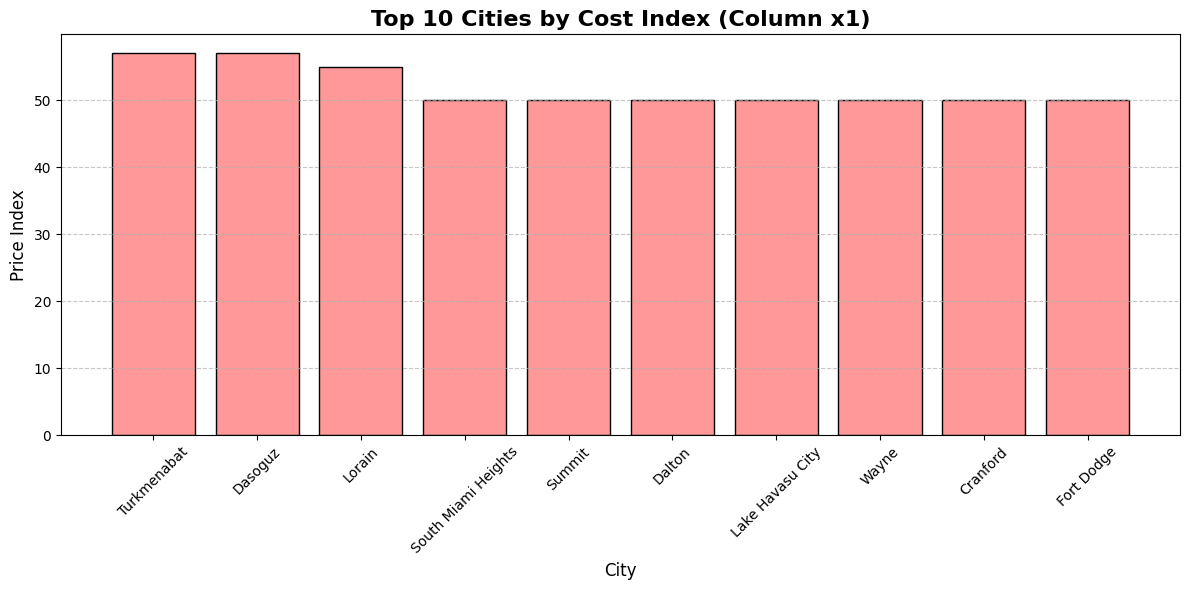

In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import os

# --- PART 1: SETUP & INGESTION (CSV -> SQL) ---
csv_filename = 'living.csv'
db_filename = 'global_economy.db'

# 1. Check if the raw data exists
if not os.path.exists(csv_filename):
    print(f"❌ ERROR: '{csv_filename}' not found. Please download it and rename it.")
else:
    # 2. Load Raw CSV
    print("Step 1: Reading CSV...")
    df_raw = pd.read_csv(csv_filename)

    # 3. Clean Column Names (Remove spaces/symbols for SQL)
    # This turns "Meal, Inexpensive Restaurant" into "x1" or "Meal_Price" depending on your file
    df_raw.columns = [c.strip().replace(' ', '_').replace('(', '').replace(')', '') for c in df_raw.columns]

    # 4. Create/Connect to SQL Database
    print("Step 2: Building Database...")
    conn = sqlite3.connect(db_filename)

    # 5. Push Data to SQL Table 'living_costs'
    df_raw.to_sql('living_costs', conn, if_exists='replace', index=False)
    print("✅ Database built successfully.")


    # --- PART 2: ANALYSIS (SQL Query) ---
    # We want the Top 10 cities based on column 'x1' (Meal Cost/Index)
    print("Step 3: Running SQL Query...")
    
    query = """
    SELECT city, x1
    FROM living_costs
    ORDER BY x1 DESC
    LIMIT 10
    """
    
    # Load ONLY the top 10 results into Python
    top_10_cities = pd.read_sql_query(query, conn)
    
    print("✅ Data Extracted. Top city is:", top_10_cities.iloc[0]['city'])


    # --- PART 3: VISUALIZATION (Matplotlib) ---
    print("Step 4: Generating Chart...")
    
    plt.figure(figsize=(12, 6)) # Make the chart wide

    # Draw the bars
    # We use the 'top_10_cities' variable we just created
    plt.bar(top_10_cities['city'], top_10_cities['x1'], color='#ff9999', edgecolor='black')

    # Styling
    plt.title('Top 10 Cities by Cost Index (Column x1)', fontsize=16, fontweight='bold')
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Price Index', fontsize=12)
    plt.xticks(rotation=45) # Rotate names so they are readable
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the final result
    plt.tight_layout() # Fixes layout if names are cut off
    plt.show()